In [1]:
!mkdir /root/.kaggle
!cp kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [2]:
!kaggle datasets download mitchellharrison/my-first-1000-valorant-games

Dataset URL: https://www.kaggle.com/datasets/mitchellharrison/my-first-1000-valorant-games
License(s): MIT
  0% 0.00/19.1k [00:00<?, ?B/s]
100% 19.1k/19.1k [00:00<00:00, 39.3MB/s]


In [3]:
!unzip my-first-1000-valorant-games.zip

Archive:  my-first-1000-valorant-games.zip
  inflating: valorant_games.csv      


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('valorant_games.csv')

In [6]:
data

,game_id,episode,act,rank,date,agent,map,outcome,round_wins,round_losses,kills,deaths,assists,kdr,avg_dmg_delta,headshot_pct,avg_dmg,acs,num_frag
0,1,6,2,Placement,4/11/2023,Cypher,Ascent,Loss,5,13,8,15,4,0.5,-61,3,76,125,3
1,2,6,2,Placement,4/12/2023,Cypher,Icebox,Loss,4,13,3,15,2,0.2,-124,22,42,59,5
2,3,6,2,Placement,4/15/2023,KAY/O,Lotus,Win,13,4,7,12,7,0.6,-46,2,87,132,5
3,4,6,2,Placement,4/15/2023,Brimstone,Ascent,Loss,9,13,18,12,10,1.5,23,14,137,230,2
4,5,6,2,Placement,4/15/2023,Cypher,Haven,Loss,1,13,6,14,3,0.4,-75,7,90,146,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,9,3,Diamond 2,11/11/2024,Astra,Pearl,Win,13,9,17,13,8,1.3,30,19,133,212,4
996,997,9,3,Diamond 2,11/11/2024,Omen,Ascent,Loss,11,13,27,14,11,1.9,41,28,176,299,1
997,998,9,3,Diamond 2,11/11/2024,Astra,Pearl,Loss,6,13,12,16,5,0.8,0,47,143,194,2
998,999,9,3,Diamond 2,11/12/2024,Omen,Split,Win,13,10,18,13,8,1.4,26,31,134,214,5


In [63]:
class GameAnalyse:
  def __init__(self,data:pd.DataFrame):
    self.data = data

  def Obj_To_category(self):
    """transform the object columns to category"""
    objColumns = self.data.select_dtypes(include='object').columns
    self.data[objColumns] = self.data[objColumns].astype('category')
  def GameScore(self):
    """Plot the scores of all 1000 game"""
    sns.barplot(data=self.data[["deaths","assists","kills"]].sum())

  def AgenetWinProb(self):
    """ probelety to win per agent based on player experience """
    number_of_wins_per_agent = data[["agent","outcome"]].loc[data["outcome"]=="Win"].groupby("agent").count()
    number_of_wins = data.loc[data["outcome"]=="Win"].shape[0]
    prob_of_win_per_agent = number_of_wins_per_agent.div(number_of_wins).reset_index()
    prob_of_win_per_agent.columns = ["agent","prob_of_win"]

    sns.barplot(data=prob_of_win_per_agent,x="agent",y="prob_of_win")
    plt.xticks(rotation=90)

  def BestSuitedAgentforMap(self):
    """Best suited agent for each map"""
    plt.figure(figsize=(10,12))
    number_of_wins_per_agent_per_map = self.data[["agent","outcome","map"]].loc[self.data["outcome"]=="Win"].groupby(["agent","map"]).size()
    number_of_wins_per_map = self.data.loc[self.data["outcome"]=="Win"].groupby("map").size()
    prob_of_win_per_agent_per_map = number_of_wins_per_agent_per_map.div(number_of_wins_per_map,level="map").reset_index()
    prob_of_win_per_agent_per_map.columns = ["agent","map","prob_of_win"]

    sns.barplot(data=prob_of_win_per_agent_per_map,x="map",y="prob_of_win",hue="agent")
    plt.xticks(rotation=90)
  def MapWinProb(self):
    """Probelety to win per map"""
    number_of_wins_per_map = self.data[["map","outcome"]].loc[self.data["outcome"]=="Win"].groupby("map").count()
    number_of_wins = self.data.loc[self.data["outcome"]=="Win"].shape[0]
    prob_of_win_per_map = number_of_wins_per_map.div(number_of_wins).reset_index()
    prob_of_win_per_map.columns = ["map","prob_of_win"]

    sns.barplot(data=prob_of_win_per_map,x="map",y="prob_of_win")
    plt.xticks(rotation=90)
  def MapLoseProb(self):
    """Probelety to lose per map"""
    number_of_lose_per_map = self.data[["map","outcome"]].loc[self.data["outcome"]=="Loss"].groupby("map").count()
    number_of_lose = self.data.loc[self.data["outcome"]=="Loss"].shape[0]
    prob_of_lose_per = number_of_lose_per_map.div(number_of_lose).reset_index()
    prob_of_lose_per.columns = ["map","prob_of_loss"]

    sns.barplot(data=prob_of_lose_per,x="map",y="prob_of_loss")
    plt.xticks(rotation=90)
  def AgentFrag(self):
    """Best played Agent"""
    agent_frags = self.data[["agent","num_frag"]].groupby("agent").sum().reset_index()
    agent_frags.columns = ["agent","total_frag"]
    sns.barplot(data=agent_frags.sort_values(by=["total_frag"],ascending=False),x="agent",y="total_frag")
    plt.xticks(rotation=90)

In [64]:
MyGameAnalysis = GameAnalyse(data)

In [65]:
MyGameAnalysis.Obj_To_category()

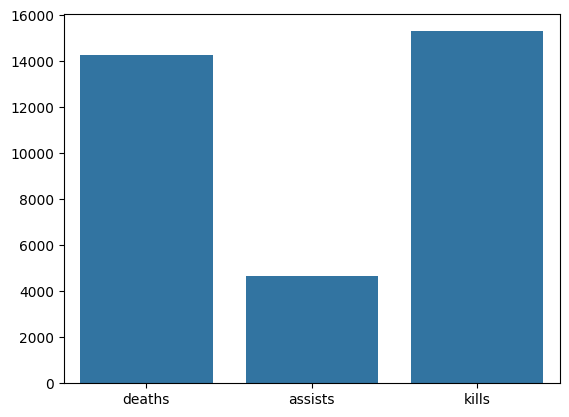

In [66]:
MyGameAnalysis.GameScore()

<ipython-input-52-afd2fdc180b0>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  number_of_wins_per_agent = data[["agent","outcome"]].loc[data["outcome"]=="Win"].groupby("agent").count()


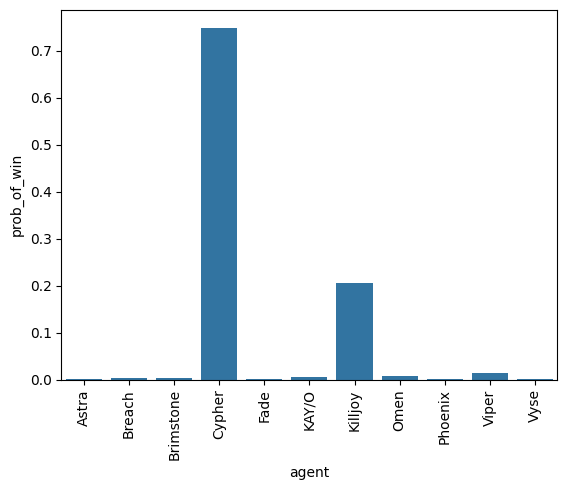

In [56]:
MyGameAnalysis.AgenetWinProb()

<ipython-input-52-afd2fdc180b0>:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  number_of_wins_per_map = self.data[["map","outcome"]].loc[self.data["outcome"]=="Win"].groupby("map").count()


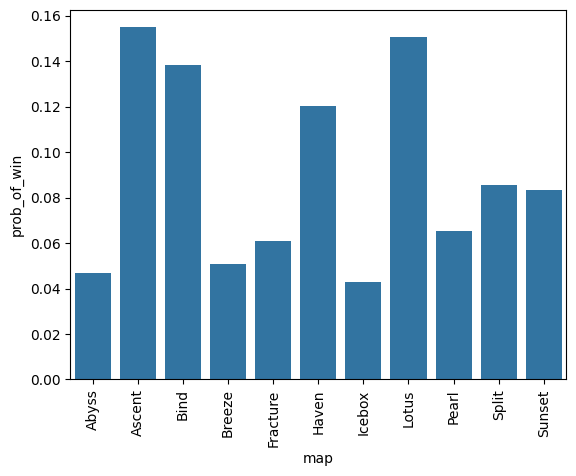

In [57]:
MyGameAnalysis.MapWinProb()

<ipython-input-52-afd2fdc180b0>:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  number_of_lose_per_map = self.data[["map","outcome"]].loc[self.data["outcome"]=="Loss"].groupby("map").count()


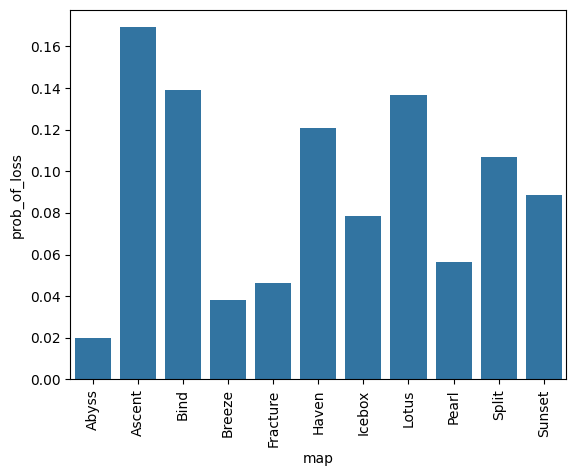

In [58]:
MyGameAnalysis.MapLoseProb()

<ipython-input-63-033eab457e1d>:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  number_of_wins_per_agent_per_map = self.data[["agent","outcome","map"]].loc[self.data["outcome"]=="Win"].groupby(["agent","map"]).size()
<ipython-input-63-033eab457e1d>:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  number_of_wins_per_map = self.data.loc[self.data["outcome"]=="Win"].groupby("map").size()


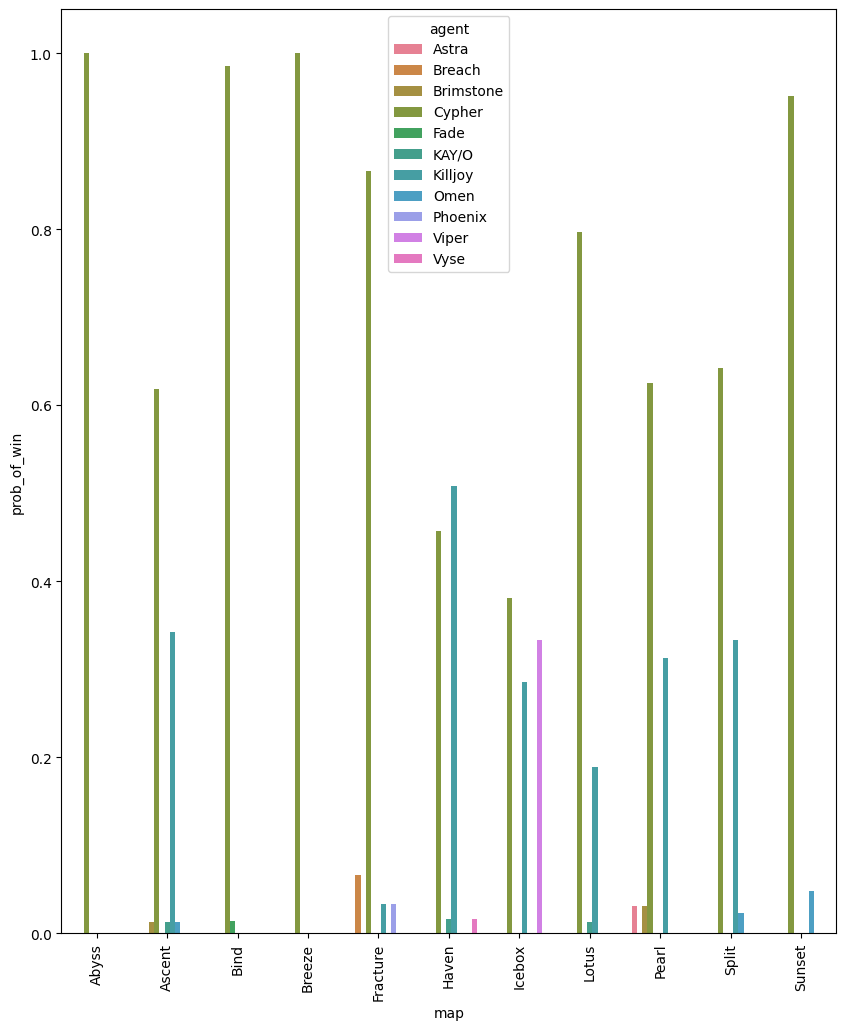

In [67]:
MyGameAnalysis.BestSuitedAgentforMap()